# MADS Notebook: Blind Source Separation

[MADS](http://madsjulia.github.io/Mads.jl) is an integrated high-performance computational framework for data/model/decision analyses.

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="https://raw.githubusercontent.com/madsjulia/Mads.jl/master/logo/mads_black_swan_logo_big_text_new_3inch.png" alt="MADS" width=20% max-width=125px;/>
</div>

[MADS](http://madsjulia.github.io/Mads.jl) can be applied to perform:

* Sensitivity Analysis
* Parameter Estimation
* Model Inversion and Calibration
* Uncertainty Quantification
* Model Selection and Model Averaging
* Model Reduction and Surrogate Modeling
* Machine Learning (e.g., Blind Source Separation, Source Identification, Feature Extraction, Matrix / Tensor Factorization, etc.)
* Decision Analysis and Support

Here, it is demonstrated how [MADS](http://madsjulia.github.io/Mads.jl) can be applied to solve a general blind Source Separation contamination problem.

## Problem setup

Import Mads (if **MADS** is not installed, first execute in the Julia REPL: `import Pkg; Pkg.add("Mads")`):

In [1]:
Pkg.resolve()
import Revise
import Mads

┌ Info: Precompiling Mads [d6bdc55b-bd94-5012-933c-1f73fc2ee992]
└ @ Base loading.jl:1317


Mads: Model Analysis & Decision Support
====

    ___      ____            ____    ____              ______
   /   \    /    \          /    |  |    \            /  __  \
  |     \  /     |         /     |  |     \          /  /  \__\
  |  |\  \/  /|  |        /      |  |      \        |  |
  |  | \    / |  |       /  /|   |  |   |\  \        \  \______.
  |  |  \__/  |  |      /  / |   |  |   | \  \        \_______  \
  |  |        |  |     /  /  |   |  |   |  \  \               \  \
  |  |        |  |    /  /===|   |  |   |___\  \    __.        |  |
  |  |        |  |   /  /    |   |  |           \   \  \______/  /
  |__|        |__|  /__/     |___|  |____________\   \__________/

MADS is an integrated high-performance computational framework for data- and model-based analyses.
MADS can perform: Sensitivity Analysis, Parameter Estimation, Model Inversion and Calibration, Uncertainty Quantification, Model Selection and Model Averaging, Model Reduction and Surrogate Modeling, Machine L

    Updating registry at `~/.julia/registries/General`
┌ Warning: could not download https://pkg.julialang.org/registries
└ @ Pkg.Types /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Pkg/src/Types.jl:980
   Resolving package versions...
[ Info: Module BIGUQ is not available!
┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/vvv/.julia/packages/PyPlot/XHEG0/src/init.jl:118


In [2]:
import Random
Random.seed!(2015)
nk = 3
s1 = (sin.(0.05:0.05:5) .+1) ./ 2
s2 = (sin.(0.3:0.3:30) .+ 1) ./ 2
s3 = rand(100);

## Source matrix (assumed unknown)

In [3]:
S = [s1 s2 s3]

100×3 Matrix{Float64}:
 0.52499      0.64776     0.518466
 0.549917     0.782321    0.249446
 0.574719     0.891663    0.244758
 0.599335     0.96602     0.304535
 0.623702     0.998747    0.0407869
 0.64776      0.986924    0.258012
 0.671449     0.931605    0.0868265
 0.694709     0.837732    0.882364
 0.717483     0.71369     0.850562
 0.739713     0.57056     0.216851
 0.761344     0.421127    0.333606
 0.782321     0.27874     0.285782
 0.802593     0.156117    0.889261
 ⋮                        
 0.0171135    0.999997    0.577248
 0.0112349    0.978188    0.956294
 0.00657807   0.913664    0.62366
 0.0031545    0.812189    0.914383
 0.000972781  0.682826    0.578899
 3.83712e-5   0.537133    0.515968
 0.000353606  0.388122    0.415338
 0.0019177    0.249105    0.961519
 0.00472673   0.1325      0.795982
 0.00877369   0.0487227   0.73677
 0.0140485    0.00525646  0.653462
 0.0205379    0.00598419  0.607898

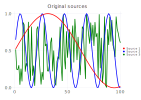

In [4]:
Mads.plotseries(S; title="Original sources", name="Source", quiet=true)

## Mixing matrix (assumed unknown)

In [5]:
H = [[1,1,1] [0,2,1] [1,0,2] [1,2,0]]

3×4 Matrix{Int64}:
 1  0  1  1
 1  2  0  2
 1  1  2  0

## Data matix (known)

In [6]:
X = S * H

100×4 Matrix{Float64}:
 1.69122   1.81399   1.56192   1.82051
 1.58168   1.81409   1.04881   2.11456
 1.71114   2.02808   1.06423   2.35805
 1.86989   2.23657   1.2084    2.53137
 1.66324   2.03828   0.705276  2.6212
 1.8927    2.23186   1.16378   2.62161
 1.68988   1.95004   0.845102  2.53466
 2.4148    2.55783   2.45944   2.37017
 2.28173   2.27794   2.41861   2.14486
 1.52712   1.35797   1.17341   1.88083
 1.51608   1.17586   1.42856   1.6036
 1.34684   0.843262  1.35389   1.3398
 1.84797   1.20149   2.58111   1.11483
 ⋮                             
 1.59436   2.57724   1.17161   2.01711
 1.94572   2.91267   1.92382   1.96761
 1.5439    2.45099   1.2539    1.83391
 1.72973   2.53876   1.83192   1.62753
 1.2627    1.94455   1.15877   1.36663
 1.05314   1.59023   1.03198   1.0743
 0.803814  1.19158   0.83103   0.776598
 1.21254   1.45973   1.92496   0.500128
 0.933209  1.06098   1.59669   0.269727
 0.794267  0.834216  1.48231   0.106219
 0.672767  0.663975  1.32097   0.0245614
 0.6344

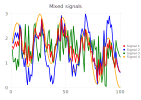

In [7]:
Mads.plotseries(X, title="Mixed signals", name="Signal", quiet=true)

## Blind signal reconstruction

In [8]:
Wipopt, Hipopt, pipopt = Mads.NMFipopt(X, nk);

OF = 3.5187622911849673e-13


## Reconstructed sources

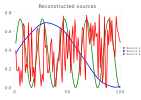

In [9]:
Mads.plotseries(Wipopt, title="Reconstructed sources", name="Source", quiet=true)

## Reproduced signals

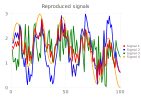

In [10]:
Mads.plotseries(Wipopt * Hipopt, title="Reproduced signals", name="Signal", quiet=true)